In [72]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [73]:
df=pd.read_csv("file:///C:/Users/Md%20Asif%20Ikbal/Downloads/collegePlace.csv")
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


In [74]:
df.shape

(2966, 8)

In [75]:
from sklearn.preprocessing import LabelEncoder

In [76]:
le=LabelEncoder()

In [77]:
df['Gender']=le.fit_transform(df['Gender'])

In [78]:
df['Stream']=le.fit_transform(df['Stream'])

In [79]:
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,1,3,1,8,1,1,1
1,21,0,1,0,7,1,1,1
2,22,0,4,1,6,0,0,1
3,21,1,4,0,8,0,1,1
4,22,1,5,0,8,1,0,1


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Age                2966 non-null   int64
 1   Gender             2966 non-null   int32
 2   Stream             2966 non-null   int32
 3   Internships        2966 non-null   int64
 4   CGPA               2966 non-null   int64
 5   Hostel             2966 non-null   int64
 6   HistoryOfBacklogs  2966 non-null   int64
 7   PlacedOrNot        2966 non-null   int64
dtypes: int32(2), int64(6)
memory usage: 162.3 KB


In [81]:
df.dtypes

Age                  int64
Gender               int32
Stream               int32
Internships          int64
CGPA                 int64
Hostel               int64
HistoryOfBacklogs    int64
PlacedOrNot          int64
dtype: object

In [82]:
df.describe()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
count,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000
mean,21.485840,0.834457,2.562374,0.703641,7.073837,0.269049,0.192178,0.552596
std,1.324933,0.371732,1.653853,0.740197,0.967748,0.443540,0.394079,0.497310
min,19.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000
25%,21.000000,1.000000,1.000000,0.000000,6.000000,0.000000,0.000000,0.000000
50%,21.000000,1.000000,3.000000,1.000000,7.000000,0.000000,0.000000,1.000000
75%,22.000000,1.000000,4.000000,1.000000,8.000000,1.000000,0.000000,1.000000
max,30.000000,1.000000,5.000000,3.000000,9.000000,1.000000,1.000000,1.000000


In [83]:
df.corr().describe()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,0.110148,0.090594,0.156680,0.132380,0.188877,0.145346,0.132782,0.218630
std,0.362904,0.374632,0.355168,0.359137,0.392115,0.370169,0.353149,0.378055
min,-0.119787,-0.200254,-0.058317,-0.081526,-0.119787,-0.200254,-0.042586,-0.038182
25%,-0.026800,-0.036535,0.003787,-0.025918,0.001054,-0.007264,-0.016923,-0.010613
50%,0.004797,-0.005109,0.009312,0.005585,0.009796,0.009804,0.006320,0.024142
75%,0.018156,0.015642,0.077866,0.062455,0.164784,0.146391,0.045491,0.281662
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [84]:
df.min()

Age                  19
Gender                0
Stream                0
Internships           0
CGPA                  5
Hostel                0
HistoryOfBacklogs     0
PlacedOrNot           0
dtype: int64

In [85]:
df.mean()

Age                  21.485840
Gender                0.834457
Stream                2.562374
Internships           0.703641
CGPA                  7.073837
Hostel                0.269049
HistoryOfBacklogs     0.192178
PlacedOrNot           0.552596
dtype: float64

In [86]:
df.max()

Age                  30
Gender                1
Stream                5
Internships           3
CGPA                  9
Hostel                1
HistoryOfBacklogs     1
PlacedOrNot           1
dtype: int64

In [87]:
len(df)

2966

In [88]:
df.corr()['CGPA'].sort_values()

Age                 -0.119787
Gender              -0.003512
HistoryOfBacklogs    0.002576
Stream               0.004602
Hostel               0.014991
Internships          0.023496
PlacedOrNot          0.588648
CGPA                 1.000000
Name: CGPA, dtype: float64

In [89]:
x=df.drop(['PlacedOrNot'],axis='columns')
y=df.PlacedOrNot.values

In [90]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=42)

In [91]:
from sklearn.preprocessing import StandardScaler

In [96]:
sc = StandardScaler()

In [103]:
xtrain=sc.fit_transform(xtrain)
xtest=sc.fit_transform(xtest)

In [104]:
lo=LogisticRegression()

In [105]:
lo.fit(xtrain,ytrain)
pred_lo=lo.predict(xtest)
accu_lo=accuracy_score(ytest,pred_lo)*100
accu_lo

73.70786516853933

In [106]:
print(classification_report(ytest,pred_lo))

              precision    recall  f1-score   support

           0       0.71      0.70      0.71       398
           1       0.76      0.76      0.76       492

    accuracy                           0.74       890
   macro avg       0.73      0.73      0.73       890
weighted avg       0.74      0.74      0.74       890



In [107]:
from sklearn.neighbors import KNeighborsClassifier

In [108]:
kne=KNeighborsClassifier()
kne.fit(xtrain,ytrain)
pred_kne=kne.predict(xtest)
accu_kne=accuracy_score(ytest,pred_kne)*100
accu_kne

84.49438202247191

In [109]:
print(classification_report(ytest,pred_kne))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       398
           1       0.89      0.83      0.85       492

    accuracy                           0.84       890
   macro avg       0.84      0.85      0.84       890
weighted avg       0.85      0.84      0.85       890



In [110]:
from sklearn.ensemble import AdaBoostClassifier

In [111]:
ada=AdaBoostClassifier()
ada.fit(xtrain,ytrain)
pred_ada=ada.predict(xtest)
accu_ada=accuracy_score(ytest,pred_ada)*100
accu_ada

87.52808988764045

In [112]:
print(classification_report(ytest,pred_ada))

              precision    recall  f1-score   support

           0       0.81      0.95      0.87       398
           1       0.95      0.82      0.88       492

    accuracy                           0.88       890
   macro avg       0.88      0.88      0.88       890
weighted avg       0.89      0.88      0.88       890



In [113]:
from sklearn.ensemble import BaggingClassifier

In [114]:
bag=BaggingClassifier()
bag.fit(xtrain,ytrain)
pred_bag=bag.predict(xtest)
accu_bag=accuracy_score(ytest,pred_bag)*100
accu_bag

87.30337078651685

In [115]:
print(classification_report(ytest,pred_bag))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       398
           1       0.92      0.84      0.88       492

    accuracy                           0.87       890
   macro avg       0.87      0.88      0.87       890
weighted avg       0.88      0.87      0.87       890



In [116]:
from sklearn.naive_bayes import GaussianNB

In [117]:
gau=GaussianNB()
gau.fit(xtrain,ytrain)
pre_gau=gau.predict(xtest)
accu_gau=accuracy_score(ytest,pre_gau)*100
accu_gau

77.30337078651685

In [118]:
print(classification_report(ytest,pre_gau))

              precision    recall  f1-score   support

           0       0.74      0.77      0.75       398
           1       0.81      0.78      0.79       492

    accuracy                           0.77       890
   macro avg       0.77      0.77      0.77       890
weighted avg       0.77      0.77      0.77       890



In [119]:
from sklearn.ensemble import ExtraTreesClassifier

In [120]:
etc=ExtraTreesClassifier()
etc.fit(xtrain,ytrain)
pre_etc=etc.predict(xtest)
accu_etc=accuracy_score(ytest,pre_etc)*100
accu_etc

87.41573033707866

In [121]:
print(classification_report(ytest,pre_etc))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       398
           1       0.92      0.85      0.88       492

    accuracy                           0.87       890
   macro avg       0.87      0.88      0.87       890
weighted avg       0.88      0.87      0.87       890



In [122]:
from sklearn.svm import SVC

In [123]:
svc=SVC()
svc.fit(xtrain,ytrain)
pre_svc=svc.predict(xtest)
accu_svc=accuracy_score(ytest,pre_svc)*100
accu_svc

86.62921348314607

In [124]:
print(classification_report(ytest,pre_svc))

              precision    recall  f1-score   support

           0       0.79      0.95      0.86       398
           1       0.96      0.79      0.87       492

    accuracy                           0.87       890
   macro avg       0.87      0.87      0.87       890
weighted avg       0.88      0.87      0.87       890



In [125]:
from sklearn.ensemble import RandomForestClassifier

In [126]:
rnd=RandomForestClassifier()
rnd.fit(xtrain,ytrain)
pre_rnd=rnd.predict(xtest)
accu_rnd=accuracy_score(ytest,pre_rnd)*100
accu_rnd

86.85393258426967

In [127]:
print(classification_report(ytest,pre_rnd))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       398
           1       0.91      0.84      0.88       492

    accuracy                           0.87       890
   macro avg       0.87      0.87      0.87       890
weighted avg       0.87      0.87      0.87       890



In [135]:
from catboost import CatBoostRegressor


In [136]:
cat=CatBoostRegressor()
cat.fit(xtrain,ytrain)
pred_cat=cat.predict(xtest)
accu_cat=accuracy_score(ytest,pred_cat)*100
accu_cat

Learning rate set to 0.04445
0:	learn: 0.4868403	total: 1.84ms	remaining: 1.84s
1:	learn: 0.4758561	total: 4.47ms	remaining: 2.23s
2:	learn: 0.4648811	total: 6.87ms	remaining: 2.28s
3:	learn: 0.4548843	total: 9.18ms	remaining: 2.28s
4:	learn: 0.4451876	total: 12ms	remaining: 2.39s
5:	learn: 0.4366978	total: 14.2ms	remaining: 2.35s
6:	learn: 0.4281558	total: 16.1ms	remaining: 2.28s
7:	learn: 0.4207605	total: 18.4ms	remaining: 2.28s
8:	learn: 0.4125172	total: 20.6ms	remaining: 2.27s
9:	learn: 0.4057525	total: 22.9ms	remaining: 2.27s
10:	learn: 0.3991502	total: 25.5ms	remaining: 2.29s
11:	learn: 0.3936431	total: 27.8ms	remaining: 2.29s
12:	learn: 0.3875782	total: 30.4ms	remaining: 2.31s
13:	learn: 0.3822681	total: 32.7ms	remaining: 2.3s
14:	learn: 0.3769377	total: 35.1ms	remaining: 2.31s
15:	learn: 0.3721896	total: 37.4ms	remaining: 2.3s
16:	learn: 0.3672398	total: 39.9ms	remaining: 2.31s
17:	learn: 0.3629839	total: 42.1ms	remaining: 2.3s
18:	learn: 0.3589167	total: 44.4ms	remaining: 2.29

218:	learn: 0.2733196	total: 448ms	remaining: 1.6s
219:	learn: 0.2731977	total: 451ms	remaining: 1.6s
220:	learn: 0.2730847	total: 453ms	remaining: 1.59s
221:	learn: 0.2730107	total: 454ms	remaining: 1.59s
222:	learn: 0.2729115	total: 456ms	remaining: 1.59s
223:	learn: 0.2728438	total: 460ms	remaining: 1.59s
224:	learn: 0.2727364	total: 462ms	remaining: 1.59s
225:	learn: 0.2726332	total: 463ms	remaining: 1.59s
226:	learn: 0.2725663	total: 465ms	remaining: 1.58s
227:	learn: 0.2724953	total: 466ms	remaining: 1.58s
228:	learn: 0.2723864	total: 468ms	remaining: 1.57s
229:	learn: 0.2722888	total: 469ms	remaining: 1.57s
230:	learn: 0.2722221	total: 471ms	remaining: 1.57s
231:	learn: 0.2721246	total: 473ms	remaining: 1.56s
232:	learn: 0.2719936	total: 474ms	remaining: 1.56s
233:	learn: 0.2719003	total: 477ms	remaining: 1.56s
234:	learn: 0.2718664	total: 479ms	remaining: 1.56s
235:	learn: 0.2717761	total: 481ms	remaining: 1.56s
236:	learn: 0.2717101	total: 483ms	remaining: 1.55s
237:	learn: 0.

429:	learn: 0.2597163	total: 914ms	remaining: 1.21s
430:	learn: 0.2596729	total: 917ms	remaining: 1.21s
431:	learn: 0.2596233	total: 919ms	remaining: 1.21s
432:	learn: 0.2595828	total: 922ms	remaining: 1.21s
433:	learn: 0.2595399	total: 924ms	remaining: 1.2s
434:	learn: 0.2594377	total: 926ms	remaining: 1.2s
435:	learn: 0.2594061	total: 927ms	remaining: 1.2s
436:	learn: 0.2593744	total: 929ms	remaining: 1.2s
437:	learn: 0.2593223	total: 931ms	remaining: 1.19s
438:	learn: 0.2592873	total: 933ms	remaining: 1.19s
439:	learn: 0.2592443	total: 935ms	remaining: 1.19s
440:	learn: 0.2592039	total: 936ms	remaining: 1.19s
441:	learn: 0.2591829	total: 938ms	remaining: 1.18s
442:	learn: 0.2591637	total: 939ms	remaining: 1.18s
443:	learn: 0.2591332	total: 942ms	remaining: 1.18s
444:	learn: 0.2591134	total: 944ms	remaining: 1.18s
445:	learn: 0.2590922	total: 946ms	remaining: 1.18s
446:	learn: 0.2590491	total: 949ms	remaining: 1.17s
447:	learn: 0.2589779	total: 953ms	remaining: 1.17s
448:	learn: 0.25

638:	learn: 0.2532835	total: 1.35s	remaining: 765ms
639:	learn: 0.2532835	total: 1.36s	remaining: 763ms
640:	learn: 0.2532764	total: 1.36s	remaining: 761ms
641:	learn: 0.2532582	total: 1.36s	remaining: 758ms
642:	learn: 0.2532539	total: 1.36s	remaining: 756ms
643:	learn: 0.2532496	total: 1.36s	remaining: 754ms
644:	learn: 0.2532285	total: 1.36s	remaining: 751ms
645:	learn: 0.2532036	total: 1.37s	remaining: 749ms
646:	learn: 0.2531718	total: 1.37s	remaining: 746ms
647:	learn: 0.2531668	total: 1.37s	remaining: 744ms
648:	learn: 0.2531512	total: 1.37s	remaining: 741ms
649:	learn: 0.2530837	total: 1.37s	remaining: 739ms
650:	learn: 0.2530682	total: 1.37s	remaining: 737ms
651:	learn: 0.2530377	total: 1.38s	remaining: 734ms
652:	learn: 0.2530125	total: 1.38s	remaining: 732ms
653:	learn: 0.2529659	total: 1.38s	remaining: 730ms
654:	learn: 0.2529569	total: 1.38s	remaining: 728ms
655:	learn: 0.2529356	total: 1.38s	remaining: 726ms
656:	learn: 0.2529184	total: 1.39s	remaining: 724ms
657:	learn: 

851:	learn: 0.2489273	total: 1.81s	remaining: 315ms
852:	learn: 0.2489178	total: 1.81s	remaining: 313ms
853:	learn: 0.2488976	total: 1.81s	remaining: 310ms
854:	learn: 0.2488965	total: 1.82s	remaining: 308ms
855:	learn: 0.2488763	total: 1.82s	remaining: 306ms
856:	learn: 0.2488491	total: 1.82s	remaining: 304ms
857:	learn: 0.2487987	total: 1.82s	remaining: 301ms
858:	learn: 0.2487930	total: 1.82s	remaining: 299ms
859:	learn: 0.2487694	total: 1.82s	remaining: 297ms
860:	learn: 0.2487620	total: 1.83s	remaining: 295ms
861:	learn: 0.2487339	total: 1.83s	remaining: 293ms
862:	learn: 0.2487339	total: 1.83s	remaining: 290ms
863:	learn: 0.2487023	total: 1.83s	remaining: 288ms
864:	learn: 0.2486754	total: 1.83s	remaining: 286ms
865:	learn: 0.2486395	total: 1.83s	remaining: 284ms
866:	learn: 0.2486122	total: 1.83s	remaining: 281ms
867:	learn: 0.2486000	total: 1.84s	remaining: 279ms
868:	learn: 0.2485755	total: 1.84s	remaining: 277ms
869:	learn: 0.2485512	total: 1.84s	remaining: 275ms
870:	learn: 

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [139]:
tre=DecisionTreeClassifier()

In [140]:
tre.fit(xtrain,ytrain)
pred_tre=tre.predict(xtest)
accu_tre=accuracy_score(ytest,pred_tre)*100
accu_tre

86.96629213483146

In [141]:
print(classification_report(ytest,pred_tre))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       398
           1       0.92      0.84      0.88       492

    accuracy                           0.87       890
   macro avg       0.87      0.87      0.87       890
weighted avg       0.88      0.87      0.87       890



In [ ]:
print(classification_report,pred_cat)

In [144]:
models = pd.DataFrame({
    'Model': ['LogisticRegression','DecisionTreeClassifier','KNeighborsClassifier' 
             ,'BaggingClassifier','GaussianNB','AdaBoostClassifier','ExtraTreesClassifier','SVM','RandomForestClassifier'],
    'Score': [accu_lo,accu_tre, accu_kne,accu_bag,accu_gau,accu_ada,accu_etc,accu_svc,accu_rnd]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
5,AdaBoostClassifier,87.528090
6,ExtraTreesClassifier,87.415730
3,BaggingClassifier,87.303371
1,DecisionTreeClassifier,86.966292
8,RandomForestClassifier,86.853933
7,SVM,86.629213
2,KNeighborsClassifier,84.494382
4,GaussianNB,77.303371
0,LogisticRegression,73.707865


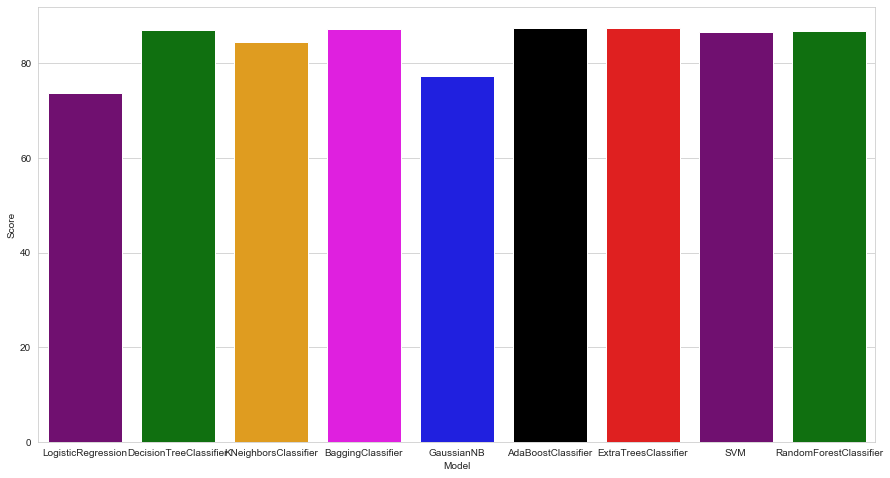

In [145]:
colors = ["purple", "green", "orange", "magenta","blue","black","red"]

sns.set_style("whitegrid")
plt.figure(figsize=(15,8))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=models['Model'],y=models['Score'], palette=colors )
plt.show()

In [146]:
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,1,3,1,8,1,1,1
1,21,0,1,0,7,1,1,1
2,22,0,4,1,6,0,0,1
3,21,1,4,0,8,0,1,1
4,22,1,5,0,8,1,0,1


In [147]:
import sklearn.cluster as cluster
from sklearn.cluster import KMeans 

In [148]:
kmns=cluster.KMeans(n_clusters=5)
kmns=kmns.fit(df[['Gender','Internships']])

In [149]:
kmns.cluster_centers_

array([[ 1.00000000e+00, -9.32587341e-15],
       [ 8.30423940e-01,  2.12718204e+00],
       [ 1.00000000e+00,  1.00000000e+00],
       [ 4.66293670e-15,  1.00000000e+00],
       [ 3.33066907e-15,  1.77635684e-15]])

In [150]:
df['Gender by Internships']=kmns.labels_

In [151]:
k_range=range(1,15)
wss=[]

In [152]:
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df[['Gender','Internships']])
    wss.append(km.inertia_)

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\ipykernel_launcher.py:3: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\ipykernel_launcher.py:3: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\ipykernel_launcher.py:3: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\ipykernel_launcher.py:3: ConvergenceWarning: Number of distinct clusters (8) found smaller than

In [153]:
wss

[2034.21915037087,
 833.7999802406505,
 448.6962105076715,
 200.46244907825002,
 100.98254364089777,
 44.178369546016604,
 9.686274509803923,
 1.9061753188728264e-25,
 6.681977811605758e-26,
 6.681977811605758e-26,
 2.3630701275932642e-26,
 2.3630701275932642e-26,
 8.692464477606151e-27,
 8.692464477606151e-27]

In [154]:
kmns=cluster.KMeans(n_clusters=5)
kmns=kmns.fit(df[['Internships','CGPA']])

In [155]:
kmns.cluster_centers_

array([[ 1.28184554e+00,  6.52357071e+00],
       [ 1.28405316e+00,  8.15116279e+00],
       [ 7.72532189e-02,  5.81759657e+00],
       [-5.66213743e-15,  7.00000000e+00],
       [-6.32827124e-15,  8.15481172e+00]])

In [156]:
df['Internships by CGPA']=kmns.labels_

In [157]:
k_range=range(1,15)
wss=[]

In [158]:
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df[['Internships','CGPA']])
    wss.append(km.inertia_)

In [159]:
wss

[4401.330411328388,
 2423.890988177998,
 1667.4537704137397,
 1221.8013534253348,
 919.3732914174207,
 654.7708131601073,
 475.1400508166163,
 339.5540207636147,
 269.8354566280626,
 186.652306758236,
 152.33346617852584,
 97.06279844229707,
 75.55710915550073,
 53.79171975324513]

In [160]:
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot,Gender by Internships,Internships by CGPA
0,22,1,3,1,8,1,1,1,2,1
1,21,0,1,0,7,1,1,1,4,3
2,22,0,4,1,6,0,0,1,3,0
3,21,1,4,0,8,0,1,1,0,4
4,22,1,5,0,8,1,0,1,0,4


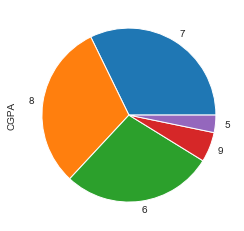

In [162]:
df.CGPA.value_counts().plot(kind='pie')

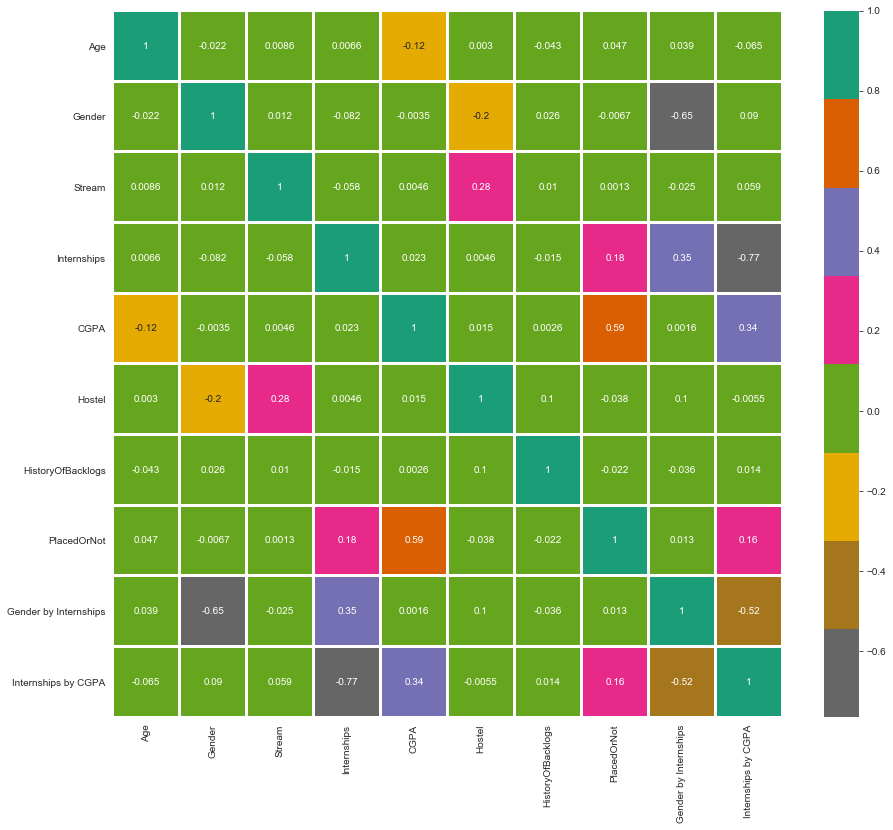

In [163]:
plt.figure(figsize=(15,13))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df.corr(),annot=True,cmap='Dark2_r',linewidths=2)
plt.show()

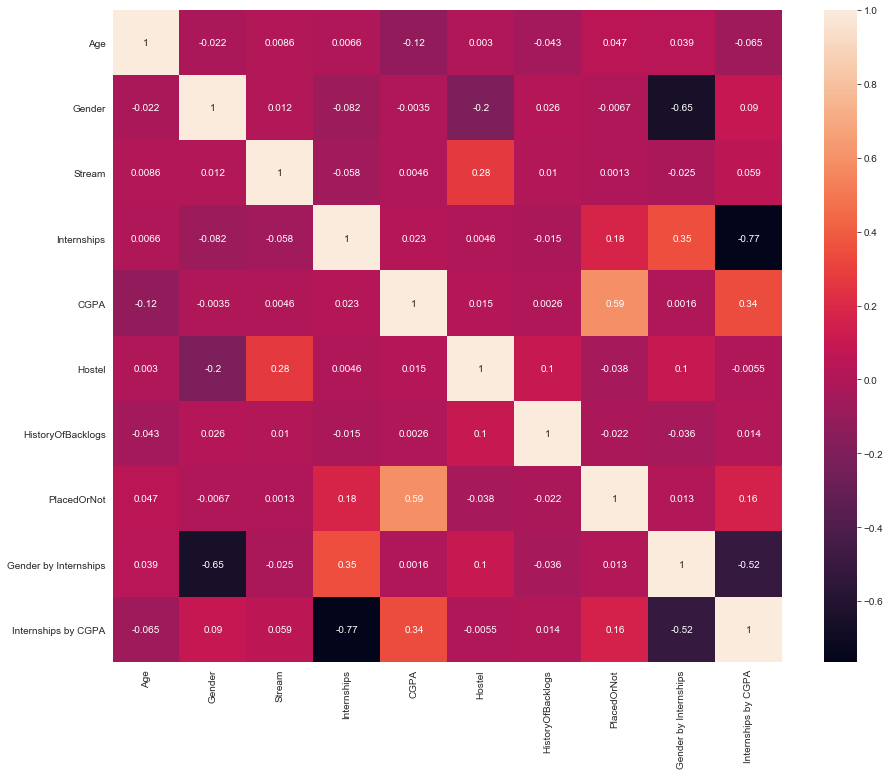

In [164]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),annot=True)

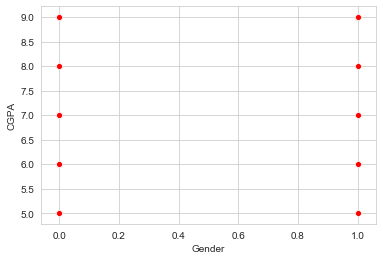

In [165]:
sns.scatterplot(x='Gender',y='CGPA',data=df,color='red')

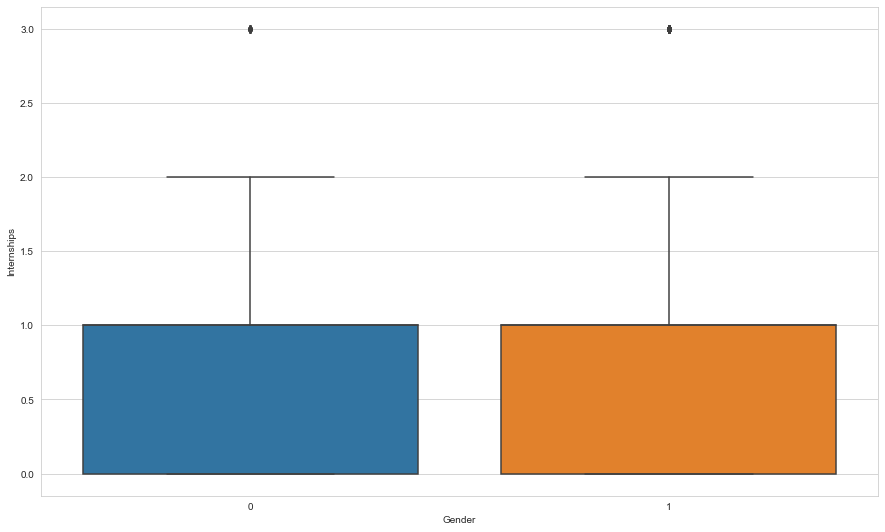

In [166]:
plt.figure(figsize=(15,9))
sns.boxplot(x='Gender',y='Internships',data=df)

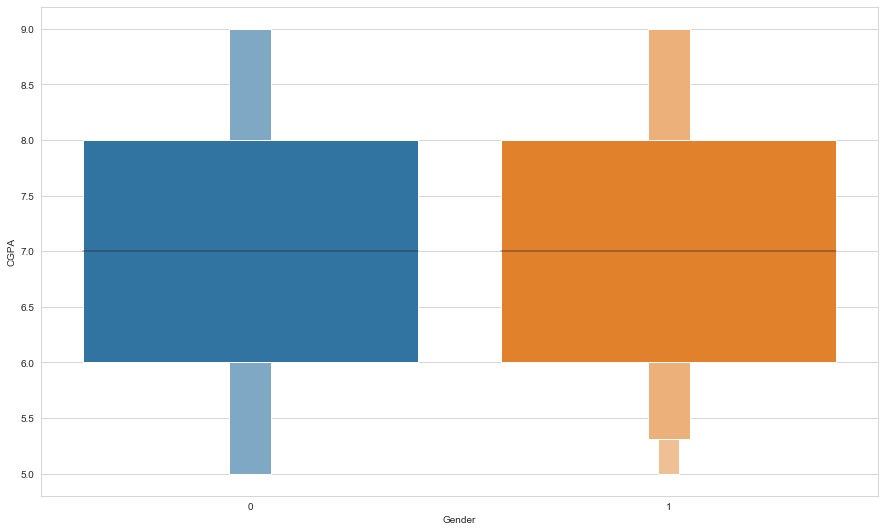

In [167]:
plt.figure(figsize=(15,9))
sns.boxenplot(x='Gender',y='CGPA',data=df)

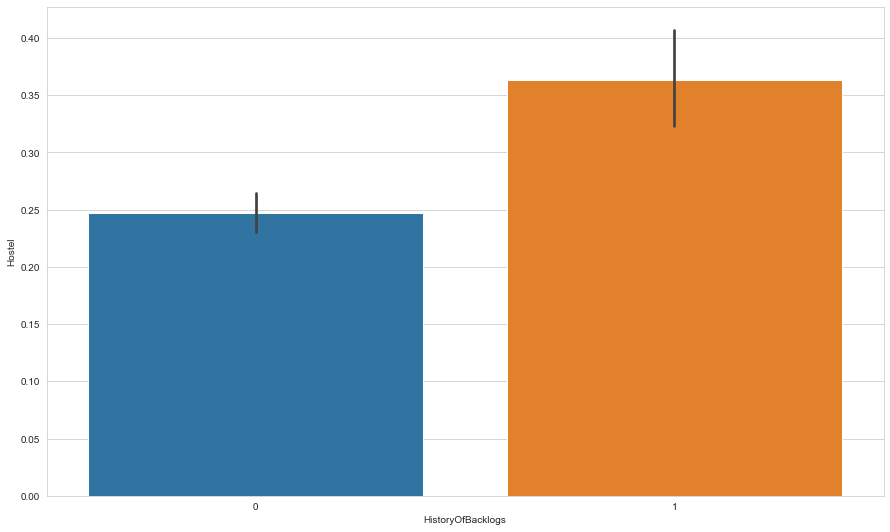

In [169]:
plt.figure(figsize=(15,9))
sns.barplot(x='HistoryOfBacklogs',y='Hostel',data=df)

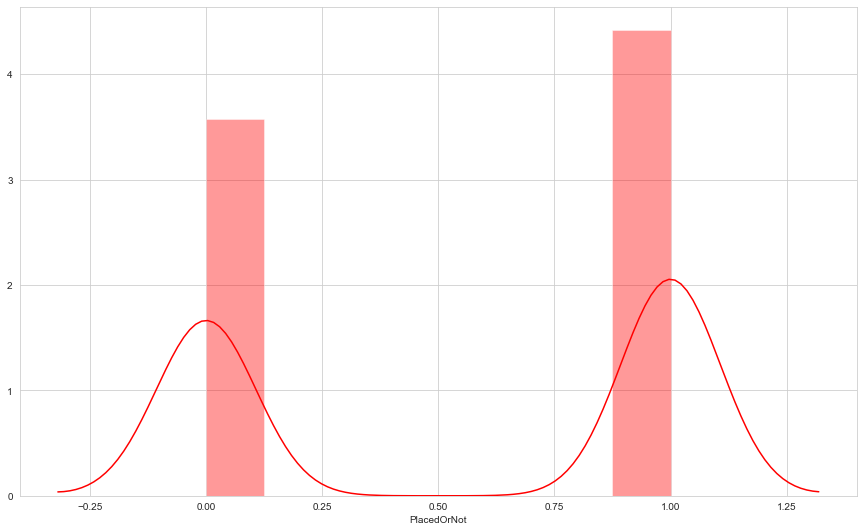

In [170]:
plt.figure(figsize=(15,9))
sns.distplot(df['PlacedOrNot'],color='red')

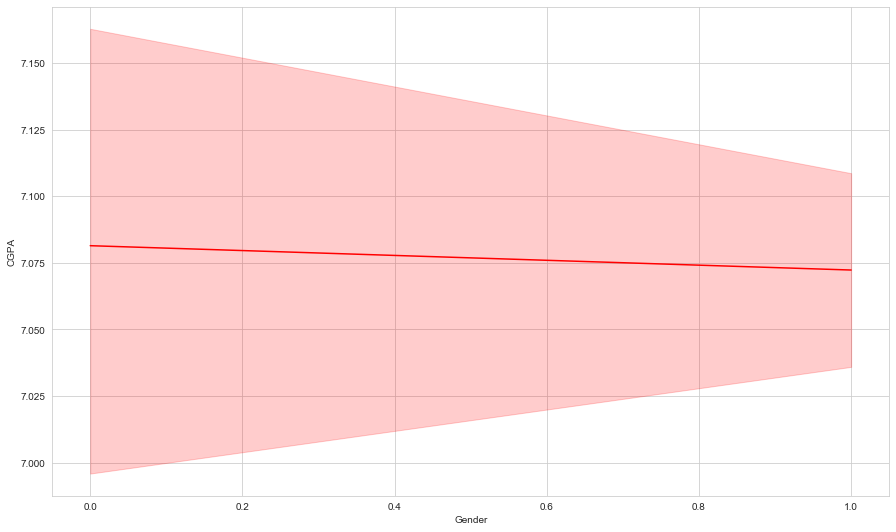

In [171]:
plt.figure(figsize=(15,9))
sns.lineplot(x='Gender', y='CGPA',data=df,color="red")

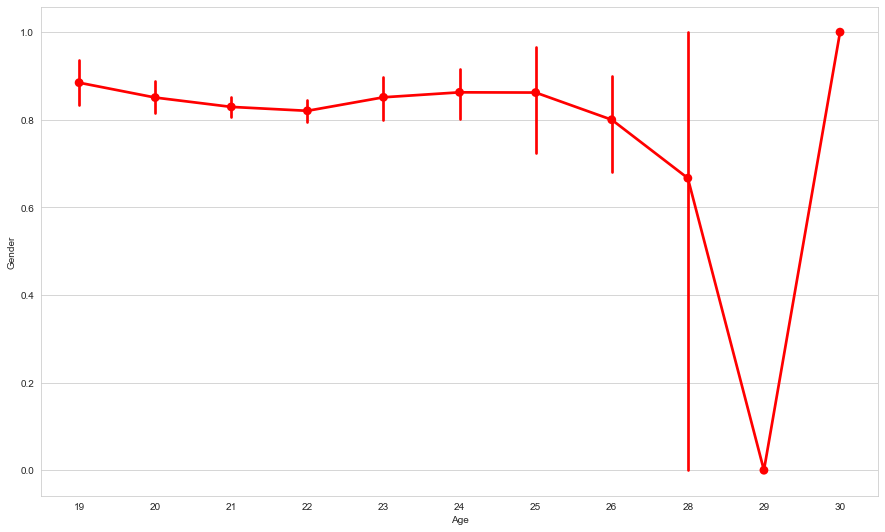

In [172]:
plt.figure(figsize=(15,9))
sns.pointplot(x='Age',y='Gender',data=df,color='red')

<Figure size 1080x648 with 0 Axes>

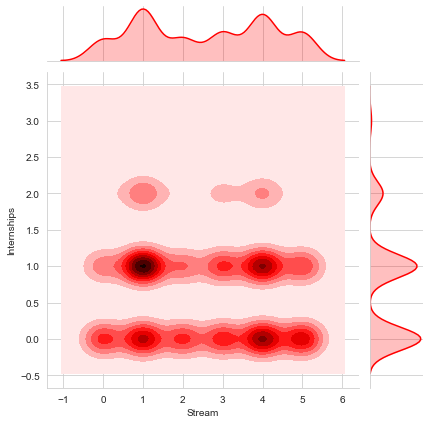

In [173]:
plt.figure(figsize=(15,9))
sns.jointplot(x='Stream',y='Internships',data=df,kind='kde',color='red')

In [174]:
df.columns

Index(['Age', 'Gender', 'Stream', 'Internships', 'CGPA', 'Hostel',
       'HistoryOfBacklogs', 'PlacedOrNot', 'Gender by Internships',
       'Internships by CGPA'],
      dtype='object')

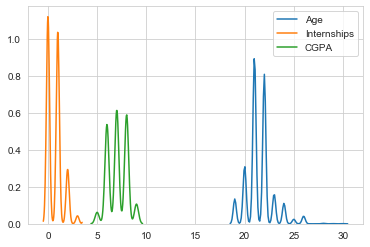

In [176]:
sns.kdeplot(df['Age'])
sns.kdeplot(df['Internships'])
sns.kdeplot(df['CGPA'])

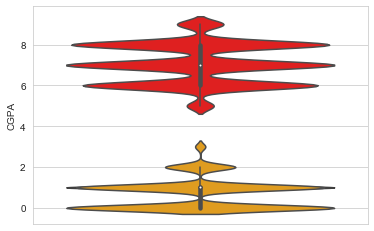

In [177]:
sns.violinplot(y="Gender",data=df)
sns.violinplot(y="Internships",data=df,color='orange')
sns.violinplot(y="CGPA",data=df,color='red')

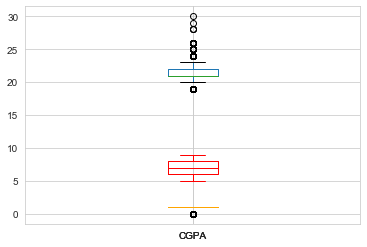

In [178]:
df.boxplot(column="Age")
df.boxplot(column="Gender",color='orange')
df.boxplot(column="CGPA",color='red')

In [179]:
import sweetviz as sv

In [180]:
data=sv.analyze(df)
data.show_html('Analyze.html')

                                             |                                             | [  0%]   00:00 ->…

Report Analyze.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [181]:
from IPython.display import IFrame

In [182]:
IFrame(src='Analyze.html',width=1000,height=600)

In [183]:
df.columns

Index(['Age', 'Gender', 'Stream', 'Internships', 'CGPA', 'Hostel',
       'HistoryOfBacklogs', 'PlacedOrNot', 'Gender by Internships',
       'Internships by CGPA'],
      dtype='object')

In [184]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [186]:
man=MinMaxScaler()
feat=['Age', 'Gender', 'Stream', 'Internships']
df[feat]=man.fit_transform(df[feat])
df[feat]

,Age,Gender,Stream,Internships
0,0.272727,1.0,0.6,0.333333
1,0.181818,0.0,0.2,0.000000
2,0.272727,0.0,0.8,0.333333
3,0.181818,1.0,0.8,0.000000
4,0.272727,1.0,1.0,0.000000
...,...,...,...,...
2961,0.363636,1.0,0.8,0.000000
2962,0.363636,1.0,1.0,0.333333
2963,0.272727,1.0,0.8,0.333333
2964,0.272727,1.0,0.2,0.333333
